In [50]:
# Data and Numbers
import pandas as pd
import numpy as np
import datetime as dt

# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score,\
precision_recall_curve,f1_score, fbeta_score,\
accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# Saving
import joblib
import pickle

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.tree import export_graphviz
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Oswald']
font = {'size'   : 12}
plt.rc('font', **font)

%precision 5

'%.5f'

In [3]:
# Bring in pickled data file with cleaned data
with open('/Users/jbpatty/project-3/df.to_pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [4]:
df

,permalink,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,company_name,avg_time_between_rounds,avg_raised_usd,time_between_first_rounds,cat_list,country,state,seed_bool,float_avg_time_between_rounds,float_time_between_first_rounds
1,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,2,...,Ondine Biomedical Inc.,101 days 00:00:00,381425.50,101 days,Biotechnology,CAN,0_other_state,1,101.0,101.0
7,/organization/10-20-media,10-20 Media,E-Commerce,2050000.0,operating,USA,MD,Baltimore,Woodbine,4,...,10-20 Media,307 days 16:00:00,512500.00,285 days,E-Commerce,USA,0_other_state,0,307.0,285.0
11,/organization/1000memories,1000memories,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,...,1000memories,411 days 00:00:00,1267500.00,411 days,Curated Web,USA,CA,1,411.0,411.0
14,/organization/100plus,100Plus,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,...,100Plus,28 days 00:00:00,625000.00,28 days,Analytics,USA,CA,1,28.0,28.0
27,/organization/140-proof,140 Proof,Advertising|Big Data Analytics|Interest Graph,5500000.0,operating,USA,CA,SF Bay Area,San Francisco,2,...,140 Proof,666 days 00:00:00,2750000.00,666 days,Advertising,USA,CA,1,666.0,666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32388,/organization/zume-life,Zume Life,Health and Wellness|iPhone|Mobile|Social Netwo...,1700000.0,closed,USA,CA,SF Bay Area,San Jose,2,...,Zume Life,456 days 00:00:00,850000.00,456 days,Mobile,USA,CA,1,456.0,456.0
32412,/organization/zyken-nightcove,Zyken - NightCove,Design|Hardware + Software|Health and Wellness,3384225.0,acquired,FRA,A8,Paris,Paris,4,...,Zyken - NightCove,882 days 08:00:00,846056.25,730 days,Health and Wellness,FRA,0_other_state,1,882.0,730.0
32415,/organization/zymetis,Zymetis,Biotechnology,2257464.0,closed,USA,MD,"Washington, D.C.",College Park,3,...,Zymetis,563 days 00:00:00,1128732.00,1106 days,Biotechnology,USA,0_other_state,0,563.0,1106.0
32417,/organization/zyncro,Zyncro,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520.0,acquired,ESP,56,Barcelona,Barcelona,2,...,Zyncro,304 days 00:00:00,1902760.00,304 days,Enterprise Software,0_other_country,0_other_state,1,304.0,304.0


In [5]:
df.columns

Index(['permalink', 'name', 'category_list', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at', 'status_bool',
       'company_name', 'avg_time_between_rounds', 'avg_raised_usd',
       'time_between_first_rounds', 'cat_list', 'country', 'state',
       'seed_bool', 'float_avg_time_between_rounds',
       'float_time_between_first_rounds'],
      dtype='object')

### Set up features and target=status_bool

In [6]:
# Category Dummies
cat_dummies = pd.get_dummies(df['cat_list'], drop_first=True)
# Country Dummies
country_dummies = pd.get_dummies(df['country'], drop_first=True)
# State Dummies
state_dummies = pd.get_dummies(df['state'], drop_first=True)

In [7]:
df.state.unique()

array(['0_other_state', 'CA', '2', 'NY', 'MA', 'FL', 'H9', 'WA', 'IL',
       'TX', 'unknown', '7', 'PA'], dtype=object)

In [8]:
# Create dummy features for category, country, and state

X_col_nodummies = [
    'funding_rounds', 'float_avg_time_between_rounds', 'avg_raised_usd',
    'float_time_between_first_rounds'
]
X_nodummies = df[X_col_nodummies]

In [9]:
# Merge in dummies to feature matrix
X = X_nodummies.merge(cat_dummies, left_index=True, right_index=True).merge(
    country_dummies, left_index=True, right_index=True).merge(state_dummies,
                                                              left_index=True,
                                                              right_index=True)

In [10]:
X

,funding_rounds,float_avg_time_between_rounds,avg_raised_usd,float_time_between_first_rounds,Advertising,Analytics,Apps,Biotechnology,Clean Technology,Curated Web,...,CA,FL,H9,IL,MA,NY,PA,TX,WA,unknown_y
1,2,101.0,381425.50,101.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,307.0,512500.00,285.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2,411.0,1267500.00,411.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
14,2,28.0,625000.00,28.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
27,2,666.0,2750000.00,666.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32388,2,456.0,850000.00,456.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32412,4,882.0,846056.25,730.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32415,3,563.0,1128732.00,1106.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32417,2,304.0,1902760.00,304.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Create target feature
y = df.status_bool

In [27]:
# Export for visualizations in Tableau
df.to_csv('/Users/jbpatty/project-3/df.csv')

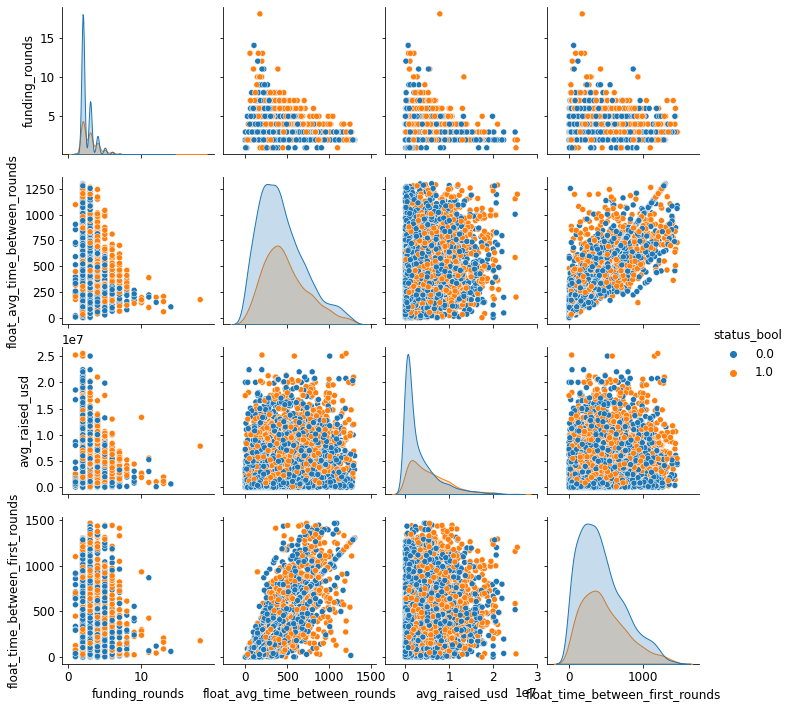

In [28]:
sns.pairplot(df[X_col_nodummies + ['status_bool']], hue='status_bool')

In [12]:
df['status_bool'].value_counts()

0.0    3667
1.0    1931
Name: status_bool, dtype: int64

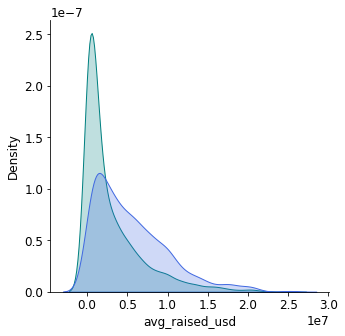

In [30]:
# Take a closer look at some of the features

# Average raised amount
plt.figure(figsize=(5, 5))
sns.kdeplot(df[df.status_bool == 0]['avg_raised_usd'],
            label='Fail',
            shade=True,
            color='teal')
sns.kdeplot(df[df.status_bool == 1]['avg_raised_usd'],
            label='Success',
            shade=True,
            color='royalblue')
sns.despine()

([<matplotlib.axis.XTick at 0x7f8ec2755ac0>,
 [Text(0, 0, '0'),
  Text(540, 0, '18'),
  Text(1080, 0, '36'),
  Text(1440, 0, '48')])

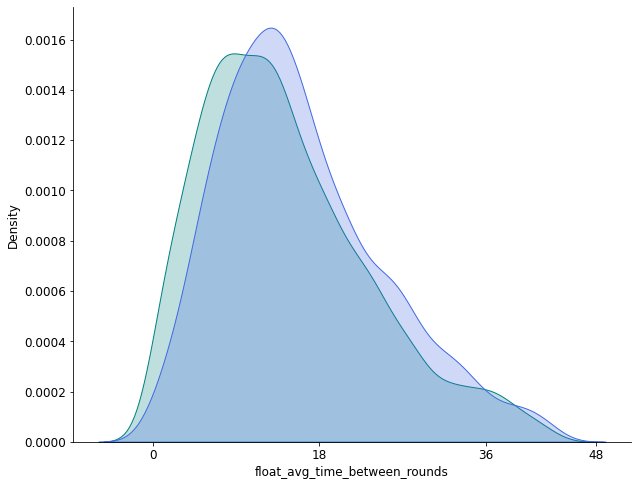

In [31]:
# average time between rounds
plt.figure(figsize=(10, 8))
sns.kdeplot(df[df.status_bool == 0]['float_avg_time_between_rounds'],
            label='Fail',
            shade=True,
            color='teal')
sns.kdeplot(df[df.status_bool == 1]['float_avg_time_between_rounds'],
            label='Success',
            shade=True,
            color='royalblue')
sns.despine()
plt.xticks((0, 540, 1080, 1440), ('0', '18', '36', '48'))

([<matplotlib.axis.XTick at 0x7f8ec71c08b0>,
 [Text(0, 0, '0'),
  Text(540, 0, '18'),
  Text(1080, 0, '36'),
  Text(1440, 0, '48')])

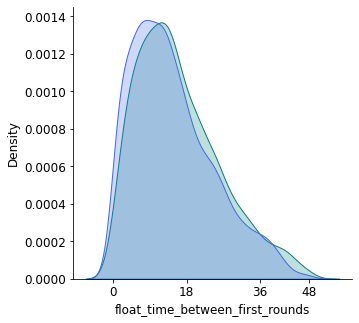

In [32]:
# average time between rounds
plt.figure(figsize=(5, 5))
sns.kdeplot(df[df.status_bool == 1]['float_time_between_first_rounds'],
            label='Fail',
            shade=True,
            color='teal')
sns.kdeplot(df[df.status_bool == 0]['float_time_between_first_rounds'],
            label='Success',
            shade=True,
            color='royalblue')
sns.despine()
plt.xticks((0, 540, 1080, 1440), ('0', '18', '36', '48'))

In [13]:
# Count target values
target_count = y.value_counts()

# # print class balance
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print('Percentage of Majority Class: {:f}'.format(
    round(target_count[0] / sum(target_count), 4) * 100))

Class 0: 3667
Class 1: 1931
Proportion: 1.9 : 1
Percentage of Majority Class: 65.510000


This data is imbalanced. I will run the model without undersampling and later will undersample to compare the performance of the model

<AxesSubplot:title={'center':'Class Count'}>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


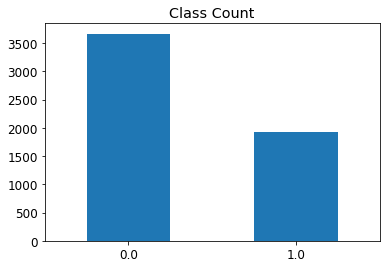

In [34]:
target_count.plot(kind='bar', title='Class Count', rot=0)

### Train test split and standardize the data

In [28]:
# Split the data with 80% to train and 20% to test
# Stratify to ensure train and test sets have 
# similar proportions of either target class
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [29]:
# Standardize the data

scaler = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values),
                             columns=X.columns)

Test out classification algorithms to see which performs the best and then optimize the top ones by tuning the hyperparameters 

### Logistic Regression

In [37]:
# Instantiate model
logreg = LogisticRegression(C=1000, solver='lbfgs')

# Fit model to the training data
logreg.fit(X_train_scaled, y_train)

# Score model
print(logreg.score(X_train_scaled, y_train))

# Pickle this for later
joblib.dump(logreg, 'logreg.pkl')

0.7065654309959803


['logreg.pkl']

In [38]:
# Calculate ROC curve for logistic regression
# fpr = false positive rate
# tpr = true positive rate
fpr_lr, tpr_lr, thresholds_lr = roc_curve(
    y_test,
    logreg.predict_proba(X_test_scaled)[:, 1])

# Calculate area under the curve (AUC) for ROC
auc_lr = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
auc_lr

0.7199072440033318

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Per this model, higher the AUC, better the model is at distinguishing between startups that wil succeed and those that will fail. This model has an AUC of .72 meaning the model correctly predicts 7/10 

### Evaluate the Models

#### Calculating f_beta

In [39]:
def fbeta(model, y_test=y_test, X_test=X_test_scaled):
    """
    Calculate the probability threshold that yields the highest f_beta value
    input: fitted model, y_test, X_test
    """
    prob_thresholds = np.arange(0, 1, 0.005)
    fbeta = []
    for prob in prob_thresholds:
        fbeta.append(
            fbeta_score(y_test,
                        model.predict_proba(X_test)[:, 1] > prob, 3))
    all_fbeta = list(zip(prob_thresholds, fbeta))
    best_fbeta = max(list(zip(prob_thresholds, fbeta)), key=lambda x: x[1])
    print(
        'Probability that yields the best fbeta score is {} with fbeta={:5f}'.
        format(best_fbeta[0], best_fbeta[1]))
    return all_fbeta, best_fbeta

In [40]:
# Calculate fbeta for logistic regression
all_fbeta_lr, best_fbeta_lr = fbeta(logreg, X_test=X_test_scaled)
p_thresh = best_fbeta_lr[0]

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.125 with fbeta=0.844156


/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.125 with fbeta=0.844156

### Precision Recall Curve with f-beta

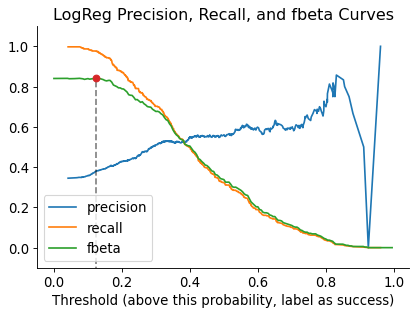

In [41]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(
    y_test,
    logreg.predict_proba(X_test_scaled)[:, 1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:], label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(list(zip(*all_fbeta_lr))[0],
         list(zip(*all_fbeta_lr))[1],
         label='fbeta')
plt.plot([best_fbeta_lr[0], best_fbeta_lr[0]], [-1, best_fbeta_lr[1]],
         '--',
         color='black',
         alpha=0.5)
plt.plot(best_fbeta_lr[0], best_fbeta_lr[1], 'o')
plt.ylim([-0.1, 1.1])
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as success)')
plt.title('LogReg Precision, Recall, and fbeta Curves')
sns.despine()

In [61]:
lr_coefs = list(zip(X_train_scaled.columns, logreg.coef_[0]))
lr_coefs_df = pd.DataFrame(lr_coefs)
lr_top_coefs = [x for x in lr_coefs if np.abs(x[1]) > .07]
lr_top_coefs = sorted(lr_top_coefs, key=(lambda x: x[1]), reverse=True)
lr_top_coefs_df = pd.DataFrame(lr_top_coefs)

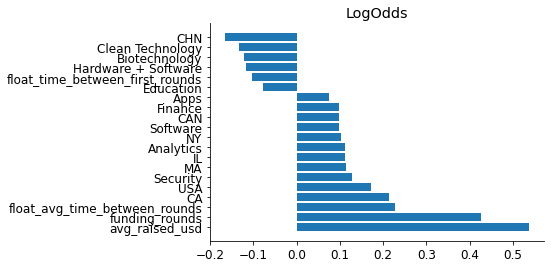

In [57]:
plt.barh([x[0] for x in lr_top_coefs], width=[x[1] for x in lr_top_coefs])
plt.title('LogOdds')
plt.grid(b=False)
sns.despine()

More Money = More Success 

### Decision Tree

In [44]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Calculate fbeta for decision tree
all_fbeta_dt, best_fbeta_dt = fbeta(dt,
                                    X_test=X_test)  # not scaled data for dt

# Calculate ROC Score and AUC for decision tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(
    y_test,
    dt.predict_proba(X_test)[:, 1])  # not scaled data for dt
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.0 with fbeta=0.840226


/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Decision Tree probability that yields the best fbeta score is 0.0 with fbeta=0.840226

In [45]:
# Feature importance

pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False)[0:15]

,feature,importance
2,avg_raised_usd,0.689948
0,funding_rounds,0.130883
30,CHN,0.039482
7,Biotechnology,0.036427
34,USA,0.028658
1,float_avg_time_between_rounds,0.017139
3,float_time_between_first_rounds,0.009879
13,Finance,0.008394
22,Security,0.007672
17,Health and Wellness,0.007531


In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
# calculate test set RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  0.6020797289396148


In [45]:
# Model Accuracy, how often is the classifier correct?
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Model accuracy:  0.6375


### kNN

In [17]:
# Instantiate Model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit Model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [49]:
# Calculate fbeta for KNN
all_fbeta_knn, best_fbeta_knn = fbeta(knn,
                                      X_test=X_test_scaled)  # scaled for knn

# Calculate ROC Score and AUC for knn
fpr_knn, tpr_knn, thresholds_knn = roc_curve(
    y_test,
    knn.predict_proba(X_test_scaled)[:, 1])  # scaled for knn
auc_knn = roc_auc_score(
    y_test,
    knn.predict_proba(X_test_scaled)[:, 1])  # scaled for knn

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.0 with fbeta=0.765869


kNN probability that yields the best fbeta score is 0.0 with fbeta=0.765869

### Naive Bayes

Target is binomial which works best in Bernoulli

In [50]:
nbb = BernoulliNB()
nbb.fit(X_train_scaled, y_train)

BernoulliNB()

In [51]:
# Calculate fbeta for Naive Bayes Bernoulli
all_fbeta_nbb, best_fbeta_nbb = fbeta(nbb,
                                      X_test=X_test_scaled)  # scaled for nbb

# Calculate ROC Score and AUC for Naive Bayes Bernoulli
fpr_nbb, tpr_nbb, thresholds_nbb = roc_curve(
    y_test,
    nbb.predict_proba(X_test_scaled)[:, 1])  # scaled for nbb
auc_nbb = roc_auc_score(
    y_test,
    nbb.predict_proba(X_test_scaled)[:, 1])  # scaled for nbb

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.02 with fbeta=0.840592


/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Naive Bayes probability that yields the best fbeta score is 0.02 with fbeta=0.840592

### Gaussian

In [52]:
nbg = GaussianNB()
nbg.fit(X_train_scaled, y_train)

GaussianNB()

In [53]:
# Calculate fbeta for Naive Bayes Gaussian
all_fbeta_nbg, best_fbeta_nbg = fbeta(nbg,
                                      X_test=X_test_scaled)  # scaled for nbg

# Calculate ROC Score and AUC for Naive Bayes Gaussian
fpr_nbg, tpr_nbg, thresholds_nbg = roc_curve(
    y_test,
    nbg.predict_proba(X_test_scaled)[:, 1])  # scaled for nbg
auc_nbg = roc_auc_score(
    y_test,
    nbg.predict_proba(X_test_scaled)[:, 1])  # scaled for nbg

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.0 with fbeta=0.840226


/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Gaussian probability that yields the best fbeta score is 0.0 with fbeta=0.840226

### Support Vector Machine (SVM Model)

In [54]:
svm_model = svm.SVC(kernel="linear", probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [55]:
# Calculate fbeta for SVM
all_fbeta_svm_model, best_fbeta_svm_model = fbeta(
    svm_model, X_test=X_test_scaled)  # scaled for SVM

# Calculate ROC Score and AUC for SVM
fpr_svm_model, tpr_svm_model, thresholds_svm_model = roc_curve(
    y_test,
    svm_model.predict_proba(X_test_scaled)[:, 1])  # scaled for SVM
auc_svm_model = roc_auc_score(
    y_test,
    svm_model.predict_proba(X_test_scaled)[:, 1])  # scaled for SVM

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.15 with fbeta=0.845039


SVM probability that yields the best fbeta score is 0.15 with fbeta=0.845039

### XGBoost

In [56]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# Calculate fbeta for XGBoost
prob_thresholds = np.arange(0, 1, 0.005)
fbeta_xgb = []
for prob in prob_thresholds:
    fbeta_xgb.append(
        fbeta_score(y_test,
                    xgb.predict_proba(X_test)[:, 1] > prob, 3))
all_fbeta_xgb = list(zip(prob_thresholds, fbeta_xgb))
best_fbeta_xgb = max(list(zip(prob_thresholds, fbeta_xgb)), key=lambda x: x[1])
print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.
      format(best_fbeta_xgb[0], best_fbeta_xgb[1]))

# Calculate ROC Score and AUC for Naive Bayes Gaussian
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(
    y_test,
    xgb.predict_proba(X_test)[:, 1])  # not scaled for xgboost
auc_xgb = roc_auc_score(
    y_test,
    xgb.predict_proba(X_test)[:, 1])  # not scaled for xgboost

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Probability that yields the best fbeta score is 0.0 with fbeta=0.840226


XGBoost probability that yields the best fbeta score is 0.0 with fbeta=0.840226

In [58]:
xgb_feats = sorted(list(zip(X.columns, xgb.feature_importances_)),
                   key=(lambda x: x[1]),
                   reverse=True)

In [59]:
xgb_feats

[('Security', 0.03898752),
 ('CHN', 0.03887404),
 ('USA', 0.03857647),
 ('Biotechnology', 0.037728433),
 ('Enterprise Software', 0.035949547),
 ('Clean Technology', 0.034626007),
 ('avg_raised_usd', 0.033635233),
 ('funding_rounds', 0.033576686),
 ('Finance', 0.031131761),
 ('Hardware + Software', 0.030500958),
 ('E-Commerce', 0.02894122),
 ('Apps', 0.02686708),
 ('NY', 0.026574137),
 ('Software', 0.026466254),
 ('Advertising', 0.026463646),
 ('Manufacturing', 0.025342507),
 ('Analytics', 0.025050217),
 ('Games', 0.024833683),
 ('WA', 0.024675772),
 ('CAN', 0.023667503),
 ('Mobile', 0.02277643),
 ('H9', 0.021524705),
 ('FRA', 0.020319102),
 ('float_time_between_first_rounds', 0.020146368),
 ('float_avg_time_between_rounds', 0.019695275),
 ('TX', 0.019175142),
 ('Curated Web', 0.017955022),
 ('CA', 0.017390748),
 ('Health Care', 0.01672803),
 ('IL', 0.016622346),
 ('Education', 0.016499255),
 ('GBR', 0.01633533),
 ('FL', 0.015570327),
 ('DEU', 0.01548887),
 ('Health and Wellness', 0.014

### Bagging Decision Trees

In [60]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,
                           bootstrap=True,
                           oob_score=True,
                           random_state=1234,
                           n_jobs=-1)
# fit
bag_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True, random_state=1234)

In [61]:
# Calculate fbeta for Bagging Decision Trees
all_fbeta_bag_dt, best_fbeta_bag_dt = fbeta(
    bag_dt, X_test=X_test)  # not scaled for bag_dt

# Calculate ROC Score and AUC for bag dt
fpr_bag_dt, tpr_bag_dt, thresholds_bag_dt = roc_curve(
    y_test,
    bag_dt.predict_proba(X_test)[:, 1])  # not scaled for bag dt
auc_bag_dt = roc_auc_score(
    y_test,
    bag_dt.predict_proba(X_test)[:, 1])  # not scaled for bag dt

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.055 with fbeta=0.844444


Bagging Decision Trees probability that yields the best fbeta score is 0.055 with fbeta=0.844444

### Random Forest

In [62]:
# Instantiate Model
rf = RandomForestClassifier(n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            random_state=1234,
                            n_jobs=-1)

# fit
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=1234)

In [63]:
# Calculate fbeta for Random Forest
all_fbeta_rf, best_fbeta_rf = fbeta(rf, X_test=X_test)  # not scaled for rf

# Calculate ROC Score and AUC for random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(
    y_test,
    rf.predict_proba(X_test)[:, 1])  # not scaled for rf
auc_rf = roc_auc_score(y_test,
                       rf.predict_proba(X_test)[:, 1])  # not scaled for rf

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jbpatty/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass beta=3 as keyword args. From version 0

Probability that yields the best fbeta score is 0.09 with fbeta=0.844564


Random Forest probability that yields the best fbeta score is 0.09 with fbeta=0.844564

In [64]:
# Feature importance

rf_feats = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Look at top 10 features
rf_feats[0:10]

,feature,importance
2,avg_raised_usd,0.268979
1,float_avg_time_between_rounds,0.192094
3,float_time_between_first_rounds,0.188554
0,funding_rounds,0.065958
37,CA,0.017736
34,USA,0.015764
25,Software,0.015567
20,Mobile,0.012487
7,Biotechnology,0.011970
42,NY,0.011021


### Model Comparison

In [65]:
models = ['lr', 'dt', 'knn', 'nbb', 'nbg', 'svm', 'xgb', 'bag_dt', 'rf']
model_aucs = [
    auc_lr, auc_dt, auc_knn, auc_nbb, auc_nbg, auc_svm_model, auc_xgb,
    auc_bag_dt, auc_rf
]
model_fbetas = [
    best_fbeta_lr[1], best_fbeta_dt[1], best_fbeta_knn[1], best_fbeta_nbb[1],
    best_fbeta_nbg[1], best_fbeta_svm_model[1], best_fbeta_xgb[1],
    best_fbeta_bag_dt[1], best_fbeta_rf[1]
]
model_names = [
    'Logistic Regression', 'Decision Tree', 'KNN', 'Bernoulli Naive Bayes',
    'Gaussian Naive Bayes', 'Support Vector Machine', 'XGBoost',
    'Bagged Decision Tree', 'Random Forest'
]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


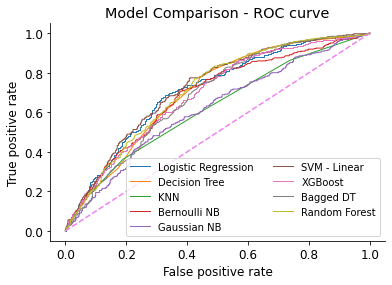

In [66]:
# Plot ROC Curves

plt.plot(fpr_lr, tpr_lr, lw=1, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, lw=1, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNN')
plt.plot(fpr_nbb, tpr_nbb, lw=1, label='Bernoulli NB')
plt.plot(fpr_nbg, tpr_nbg, lw=1, label='Gaussian NB')
plt.plot(fpr_svm_model, tpr_svm_model, lw=1, label='SVM - Linear')
plt.plot(fpr_xgb, tpr_xgb, lw=1, label='XGBoost')
plt.plot(fpr_bag_dt, tpr_bag_dt, lw=1, label='Bagged DT')
plt.plot(fpr_rf, tpr_rf, lw=1, label='Random Forest')

plt.plot([0, 1], [0, 1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Model Comparison - ROC curve')
plt.legend(ncol=2, fontsize='small')
sns.despine()

In [67]:
# Print AUC Scores
for model in list(zip(model_names, model_aucs)):
    print("ROC AUC score = {:3f} for {}".format(model[1], model[0]))

ROC AUC score = 0.711207 for Logistic Regression
ROC AUC score = 0.697931 for Decision Tree
ROC AUC score = 0.620602 for KNN
ROC AUC score = 0.684603 for Bernoulli Naive Bayes
ROC AUC score = 0.615403 for Gaussian Naive Bayes
ROC AUC score = 0.719519 for Support Vector Machine
ROC AUC score = 0.690107 for XGBoost
ROC AUC score = 0.683895 for Bagged Decision Tree
ROC AUC score = 0.707473 for Random Forest


In [68]:
# Print fbeta Scores
for model in list(zip(model_names, model_fbetas)):
    print("f_beta score = {:3f} for {}".format(model[1], model[0]))

f_beta score = 0.844156 for Logistic Regression
f_beta score = 0.840226 for Decision Tree
f_beta score = 0.765869 for KNN
f_beta score = 0.840592 for Bernoulli Naive Bayes
f_beta score = 0.840226 for Gaussian Naive Bayes
f_beta score = 0.845039 for Support Vector Machine
f_beta score = 0.840226 for XGBoost
f_beta score = 0.844444 for Bagged Decision Tree
f_beta score = 0.844564 for Random Forest


The best performing model is the Support Vector Machine. The linear regression model also performed well.